In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
titanic = sns.load_dataset("titanic")
print(titanic)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

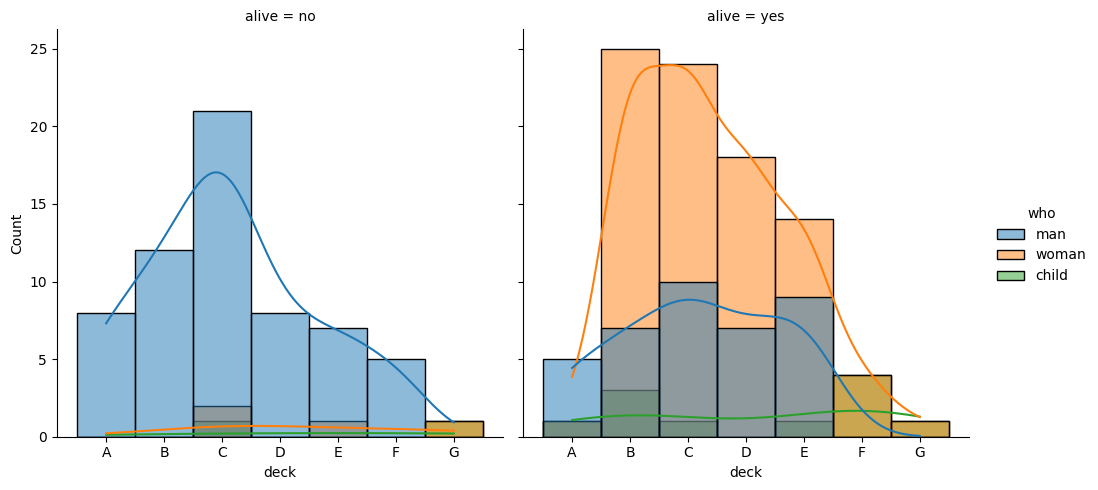

In [4]:
sns.displot(data=titanic, x="deck", col="alive", hue="who", kde=True)

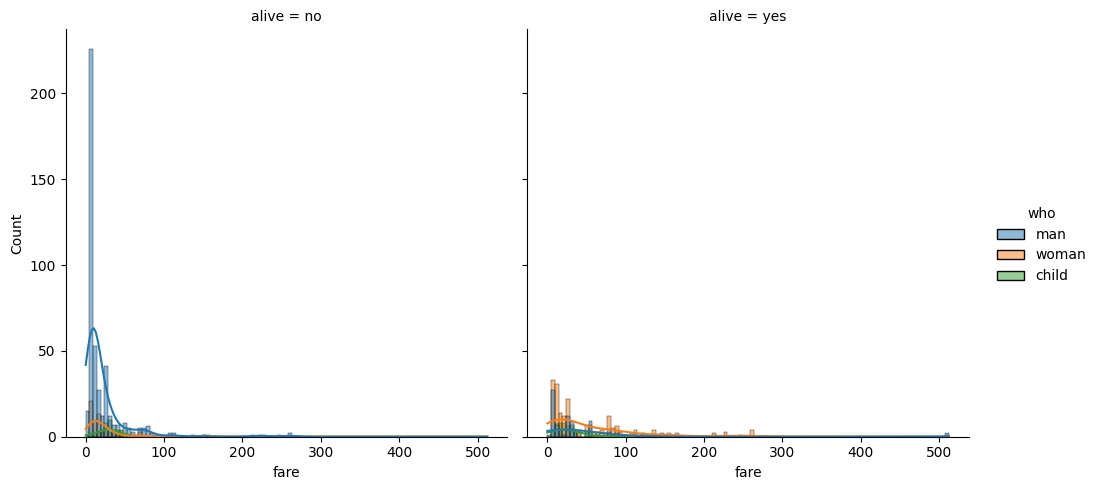

In [5]:
sns.displot(data=titanic, x="fare", col="alive", hue="who", kde=True)

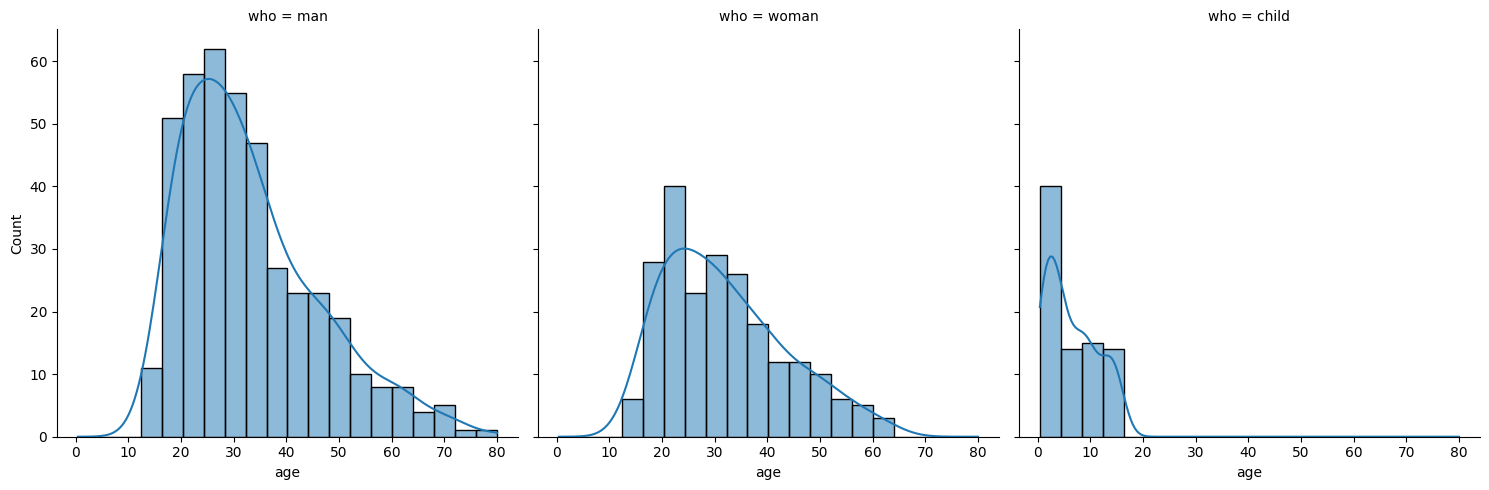

In [6]:
sns.displot(data=titanic, x="age", col="who", kde=True)

<AxesSubplot: xlabel='age', ylabel='Proportion'>

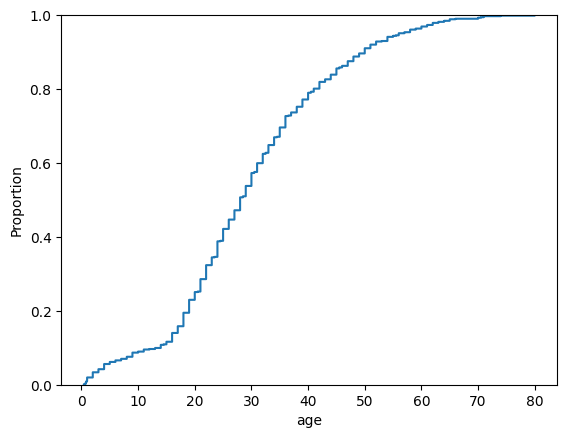

In [7]:
sns.ecdfplot(data=titanic, x="age")

## Uczenie maszynowe

In [8]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [9]:
print(f"Features: \n{iris_dataset.keys()}")
print(iris_dataset.data)

Features: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3

In [10]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


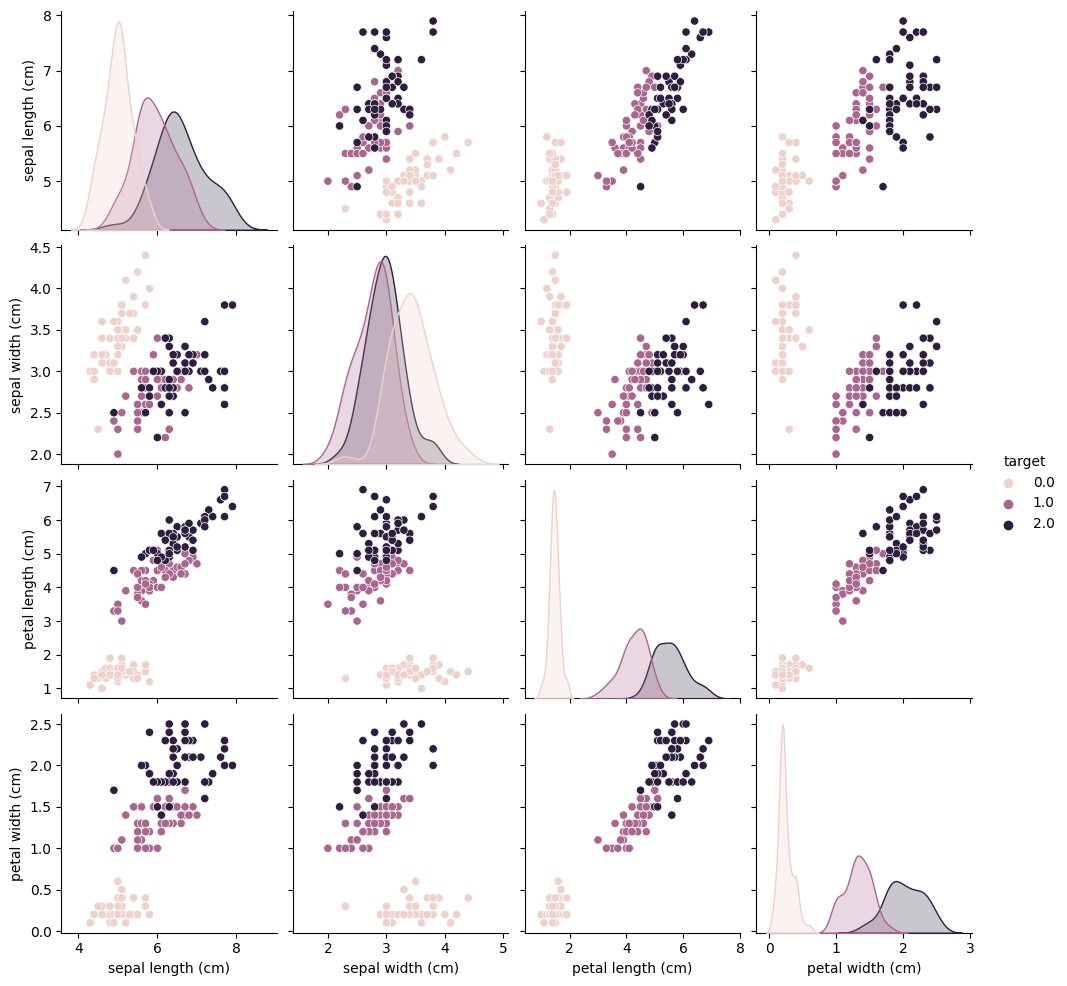

In [11]:
# konwersja do dataframe
data_iris = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']], columns= iris_dataset['feature_names'] + ['target'])
sns.pairplot(data=data_iris, hue='target')

### Regresja liniowa

In [12]:
df = pd.DataFrame()
df['X'] = [1, 2, 3, 4, 5]
df['Y'] = [4, 6, 9, 11, 18]
df

,X,Y
0,1,4
1,2,6
2,3,9
3,4,11
4,5,18


In [13]:
def avgs(x, y):
    Mx = np.average(x)
    My = np.average(y)
    return Mx, My

Mx, My = avgs(df['X'], df['Y'])

print(f"{Mx=}, {My=}")

Mx=3.0, My=9.6


In [14]:
def stds(x, y):
    Sx = np.std(x, ddof=1)
    Sy = np.std(y, ddof=1)
    return Sx, Sy

Sx, Sy = stds(df['X'], df['Y'])

print(f"{Sx=}, {Sy=}")

Sx=1.5811388300841898, Sy=5.412947441089743


In [15]:
r = sp.stats.pearsonr(df['X'], df['Y'])
print(f"{r=}")

r=PearsonRResult(statistic=0.963940292431027, pvalue=0.008175306505977628)


In [16]:
a = r.statistic * (Sy / Sx)
b = My - (a * Mx)
print(f"{a=}, {b=}")

a=3.3, b=-0.29999999999999893


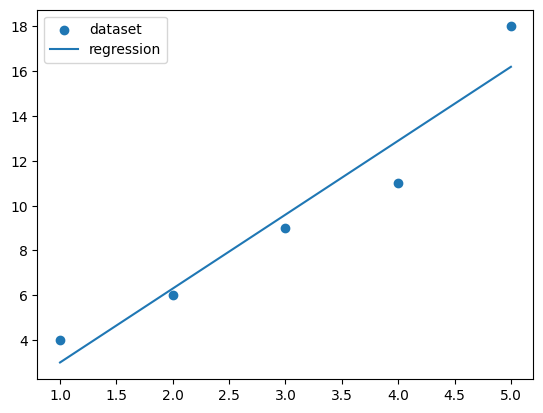

In [22]:
def f(a, b, x):
    return a*x + b

fy = f(a, b, df['X'])

automatic_fy = sp.stats.linregress(df['X'], df['Y'])

def plot_func(x, y, fy):
    plt.figure()
    plt.scatter(x, y, label="dataset")
    plt.plot(x, fy, label="regression")
    # plt.plot(x, automatic_fy, label="auto_regression")
    plt.legend()
    plt.show()

plot_func(df['X'], df['Y'], fy)

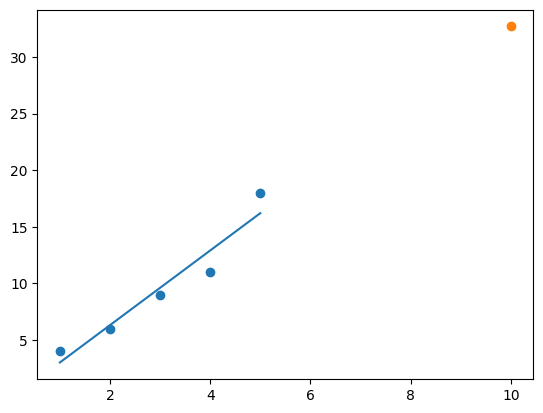

In [18]:
x10 = 10
y10 = f(a, b, 10)

plt.figure()
plt.scatter(df['X'], df['Y'])
plt.scatter(x10, y10)
plt.plot(df['X'], fy)

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(df['Y'], f(a, b, df['X']))
print(f"r2={r2*100}%")
print(f"loss={(1 - r2)*100}%")

r2=92.91808873720137%
loss=7.081911262798624%


========= i=10 =========
len(x)=6, len(y)=6
Mx=4.166666666666667, My=13.449999999999998
Sx=3.1885210782848317, Sy=10.600707523557094
r=PearsonRResult(statistic=0.9925865358474885, pvalue=8.223545615190943e-05)
a=3.3, b=-0.3000000000000025
r2=98.52280311457174%
loss=1.4771968854282558%
========= i=14 =========
len(x)=7, len(y)=7
Mx=5.571428571428571, My=18.085714285714282
Sx=4.720774754816659, Sy=15.622892238787342
r=PearsonRResult(statistic=0.9971621421171747, pvalue=8.227537625407865e-07)
a=3.2999999999999985, b=-0.2999999999999936
r2=99.43323376717126%
loss=0.5667662328287415%
========= i=18 =========
len(x)=8, len(y)=8
Mx=7.125, My=23.212499999999995
Sx=6.197637798848388, Sy=20.481171667098117
r=PearsonRResult(statistic=0.998585679990907, pvalue=7.065164496637812e-09)
a=3.2999999999999985, b=-0.2999999999999936
r2=99.71733602829023%
loss=0.2826639717097623%
========= i=23 =========
len(x)=9, len(y)=9
Mx=8.88888888888889, My=29.033333333333328
Sx=7.849274559544411, Sy=25.922625252855

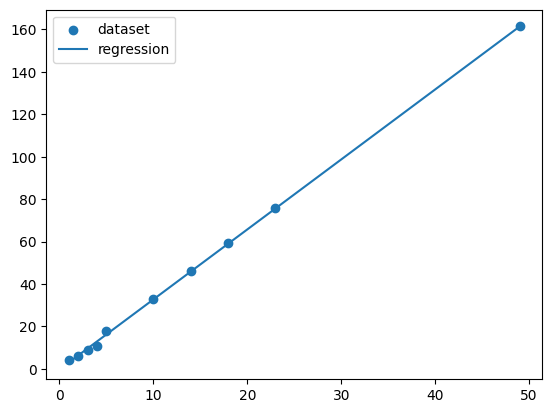

In [23]:
x = df['X'].to_numpy()
y = df['Y'].to_numpy()

for i in [10, 14, 18, 23, 49]:
    x = np.append(x, i)
    y = np.append(y, f(a, b, i))

    Mx, My = avgs(x, y)
    Sx, Sy = stds(x, y)

    r = sp.stats.pearsonr(x, y)

    a = r.statistic * (Sy / Sx)
    b = My - (a * Mx)
    
    fy = f(a, b, x)

    r2 = r2_score(y, fy)

    print(f"========= {i=} =========")
    print(f"{len(x)=}, {len(y)=}")
    print(f"{Mx=}, {My=}")
    print(f"{Sx=}, {Sy=}")
    print(f"{r=}")
    print(f"{a=}, {b=}")
    print(f"r2={r2*100}%")
    print(f"loss={(1 - r2)*100}%")

plot_func(x, y, fy)


---

Text(0, 0.5, 'y')

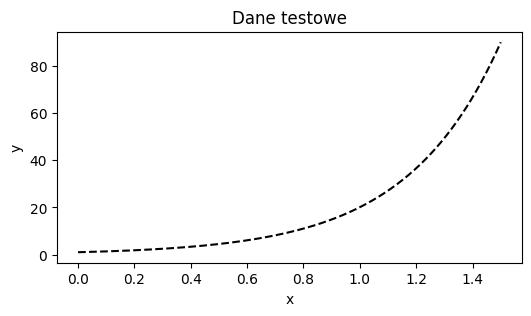

In [26]:
def f(x):
    return np.exp(3*x)


x_test = np.linspace(0., 1.5, 2000)
y_test = f(x_test)

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(x_test, y_test, '--k')
ax.set_title("Dane testowe")
ax.set_xlabel('x')
ax.set_ylabel('y')

Text(0, 0.5, 'y')

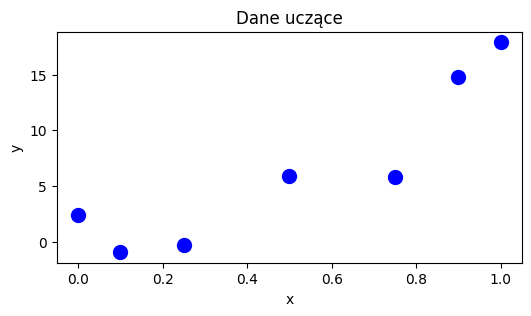

In [27]:
x_train = np.array([0, 0.1, .25, .5, .75, .9, 1])
y_train = f(x_train) + 2 * np.random.randn(len(x_train))

fig, ax = plt.subplots(1,1, figsize=(6,3))
ax.plot(x_train, y_train, 'ob', ms=10)
ax.set_title("Dane uczące")
ax.set_xlabel('x')
ax.set_ylabel('y')

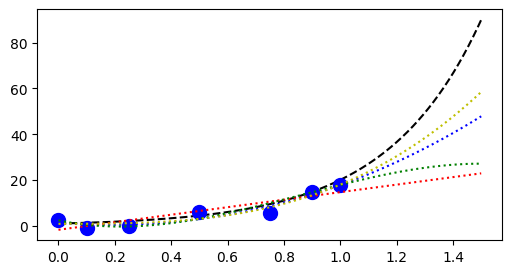

In [46]:
import sklearn.linear_model as lm

lr = lm.LinearRegression()
lr.fit(x_train[:, np.newaxis], y_train[:, np.newaxis])
y_lr = lr.predict(x_test[:, np.newaxis])

lrp4 = lm.LinearRegression()
lrp4.fit(np.vander(x_train, 4), y_train)
y_lrp4 = lrp4.predict(np.vander(x_test, 4))

hr = lm.HuberRegressor()
hr.fit(np.vander(x_train, 4), y_train)
y_hr = hr.predict(np.vander(x_test, 4))

ardr = lm.ARDRegression(alpha_1=0.01, alpha_2=0.04, lambda_1=0.0003, lambda_2=0.005)
ardr.fit(np.vander(x_train, 4), y_train)
y_ardr = ardr.predict(np.vander(x_test, 4))

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_test, y_test, '--k')
ax.plot(x_train, y_train, 'ob', ms=10)
ax.plot(x_test, y_lrp4, ':b')
ax.plot(x_test, y_lr, ':r')
ax.plot(x_test, y_hr, ':g')
ax.plot(x_test, y_ardr, ':y')